
# Assignment No 4a
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [31]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\muham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 
import numpy as np

In [33]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

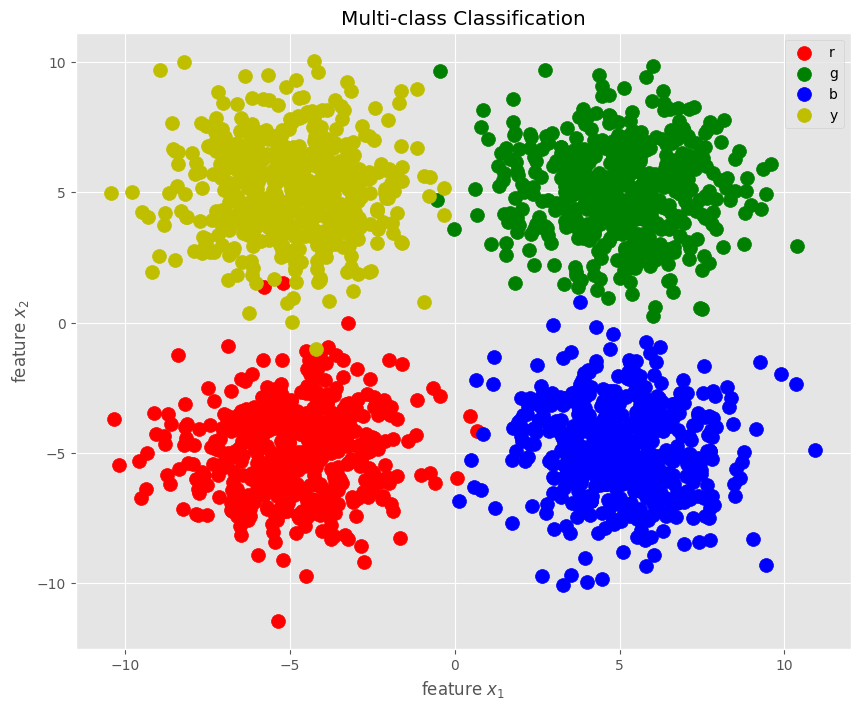

In [34]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
xint=int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,xint)
x2 = np.random.multivariate_normal(mean2,cov,xint)
x3 = np.random.multivariate_normal(mean3,cov,xint)
x4 = np.random.multivariate_normal(mean4,cov,xint)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((xint,1)),2*np.ones((xint,1)),3*np.ones((xint,1)),4*np.ones((xint,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x2int=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,x2int)
x2 = np.random.multivariate_normal(mean2,cov,x2int)
x3 = np.random.multivariate_normal(mean3,cov,x2int)
x4 = np.random.multivariate_normal(mean4,cov,x2int)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((x2int,1)),2*np.ones((x2int,1)),3*np.ones((x2int,1)),4*np.ones((x2int,1))))


In [35]:
import randomForest as rf

In [36]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')

In [37]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [38]:
np.spacing(1)

np.float64(2.220446049250313e-16)

In [39]:
#%pdb ON
rfc.train(X,Y)

Building tree at depth 0 with purity 0.28 and 1200 examples
Building tree at depth 1 with purity 0.5410628019323671 and 621 examples
Building tree at depth 2 with purity 0.5390879478827362 and 614 examples
Building tree at depth 3 with purity 1.0 and 282 examples
Building tree at depth 4 with purity 1.0 and 7 examples
Building tree at depth 5 with purity 1.0 and 5 examples
Building tree at depth 5 with purity 1.0 and 2 examples
Building tree at depth 4 with purity 1.0 and 275 examples
Building tree at depth 5 with purity 1.0 and 14 examples
Building tree at depth 5 with purity 1.0 and 261 examples
Building tree at depth 3 with purity 0.9969879518072289 and 332 examples
Building tree at depth 4 with purity 0.5 and 2 examples
Building tree at depth 4 with purity 1.0 and 330 examples
Building tree at depth 5 with purity 1.0 and 6 examples
Building tree at depth 5 with purity 1.0 and 324 examples
Building tree at depth 2 with purity 0.7142857142857143 and 7 examples
Building tree at depth 

In [40]:
np.spacing(1)

np.float64(2.220446049250313e-16)

In [41]:
len(rfc.trees)

10

In [42]:
# Training Confusion Matrix...
%pdb
Yp=rfc.predict(X)
print(Yp)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
[1. 1. 1. ... 4. 4. 4.]
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,498,0,0,2,500
2.0,0,499,0,1,500
3.0,2,1,497,0,500
4.0,1,0,0,499,500
All,501,500,497,502,2000


In [43]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp).flatten()) / float(Y.shape[0])
print (acc)
assert_greater_equal(acc, 0.40)

0.9965


In [44]:
Y.shape

(2000, 1)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


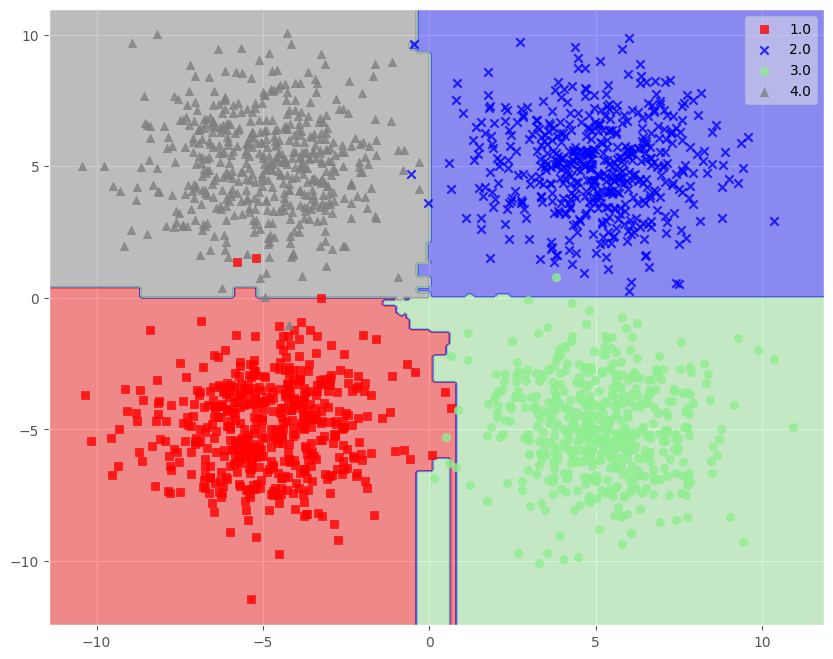

In [45]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [46]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Ypt.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(1000,) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,249,0,0,1,250
2.0,0,249,0,1,250
3.0,4,1,245,0,250
4.0,1,1,0,248,250
All,254,251,245,250,1000


In [47]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 
print (acc)
assert_greater_equal(acc, 0.40)

0.991


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


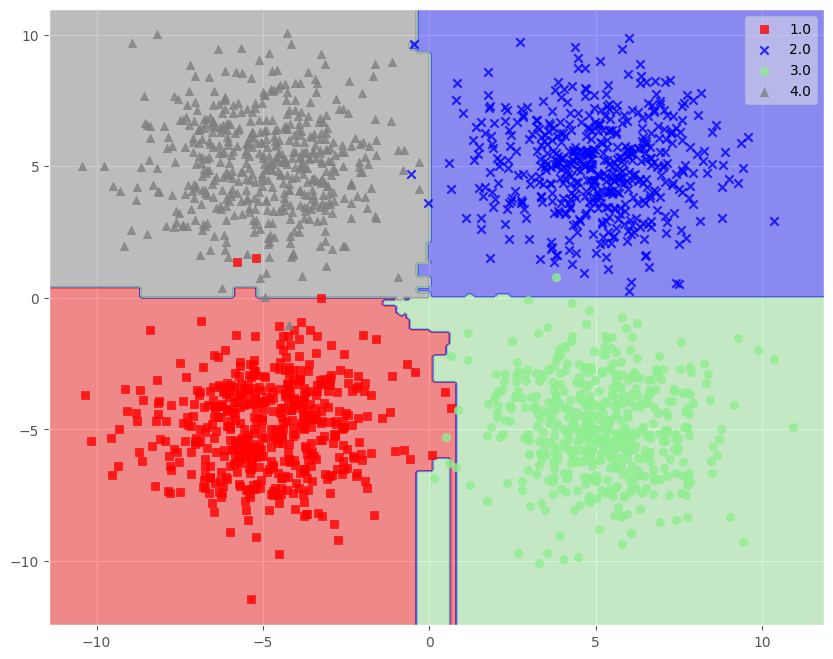

In [48]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]


AttributeError: 'Axes' object has no attribute 'hold'

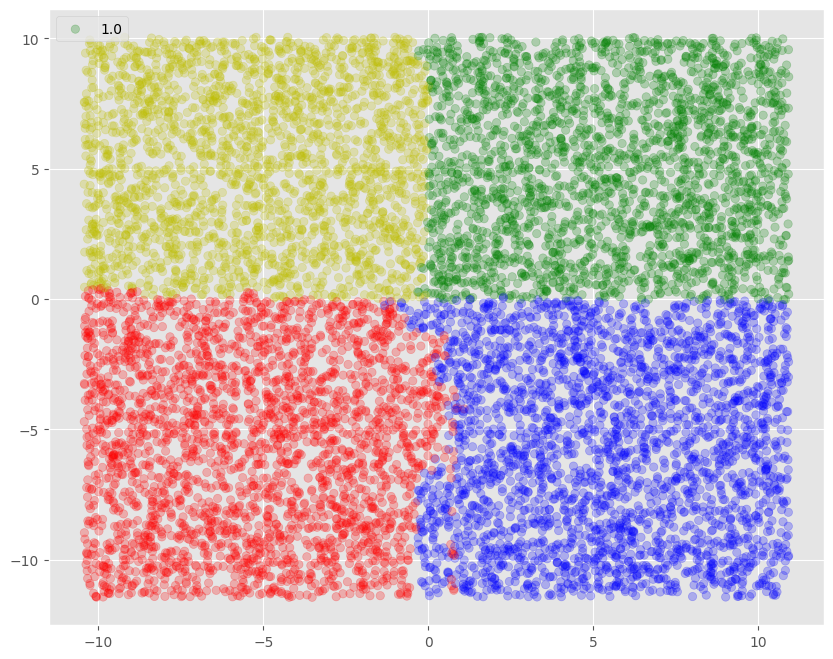

In [49]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

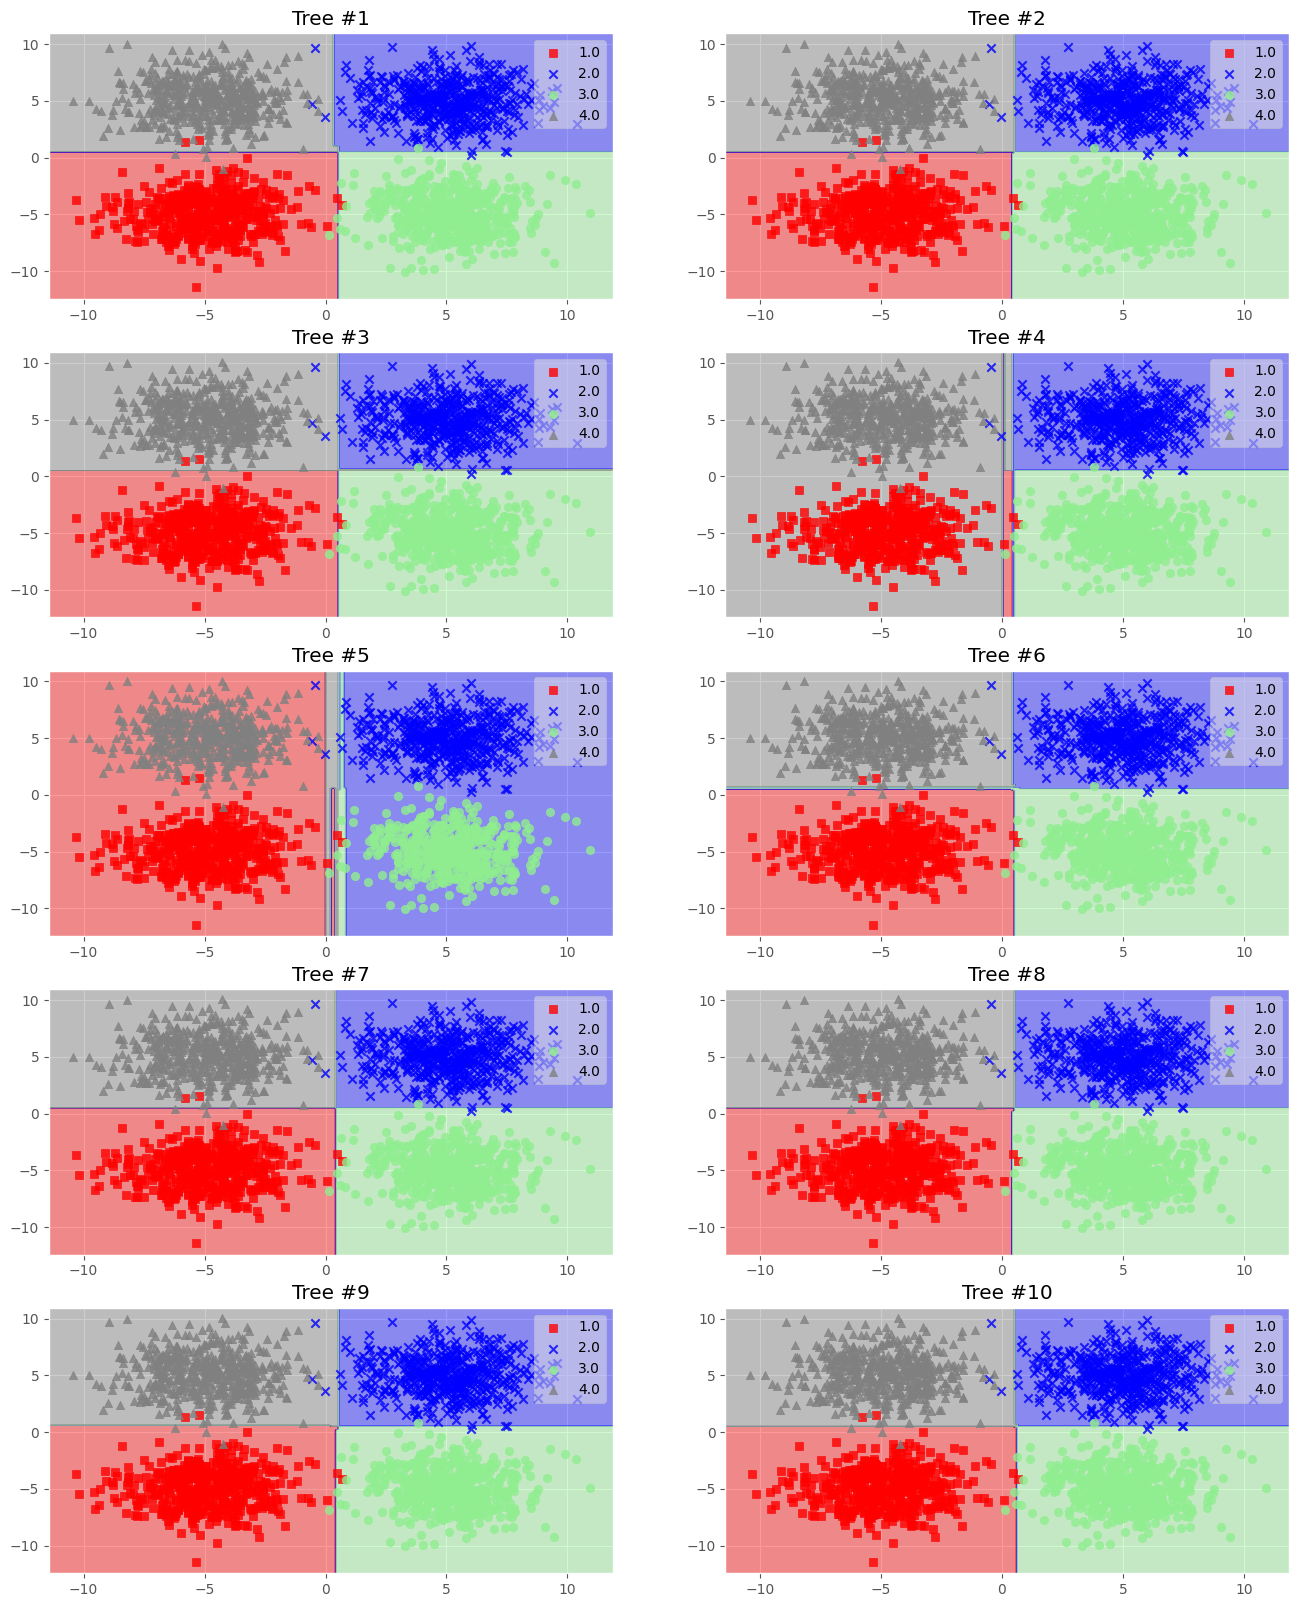

In [50]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(int(nrows),ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

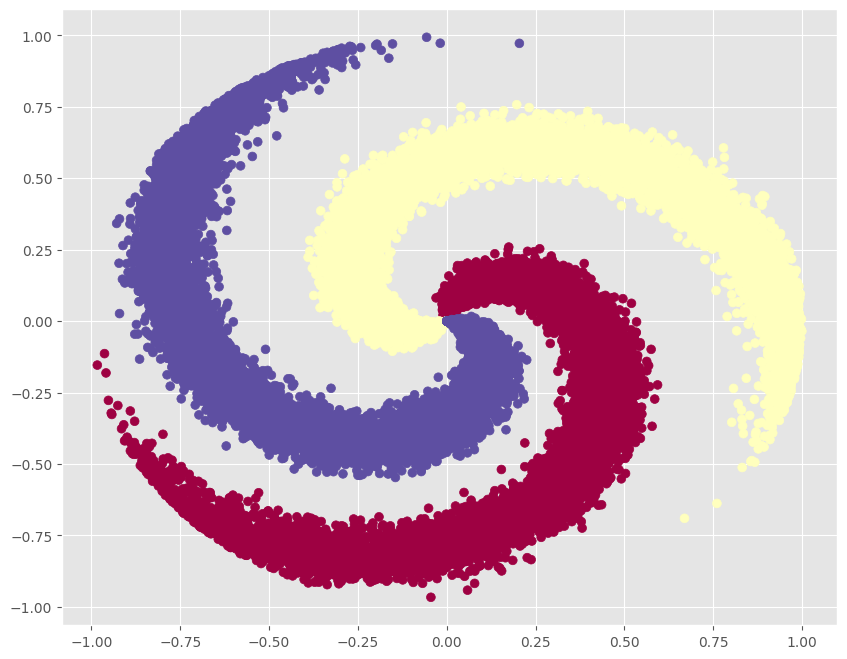

In [51]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

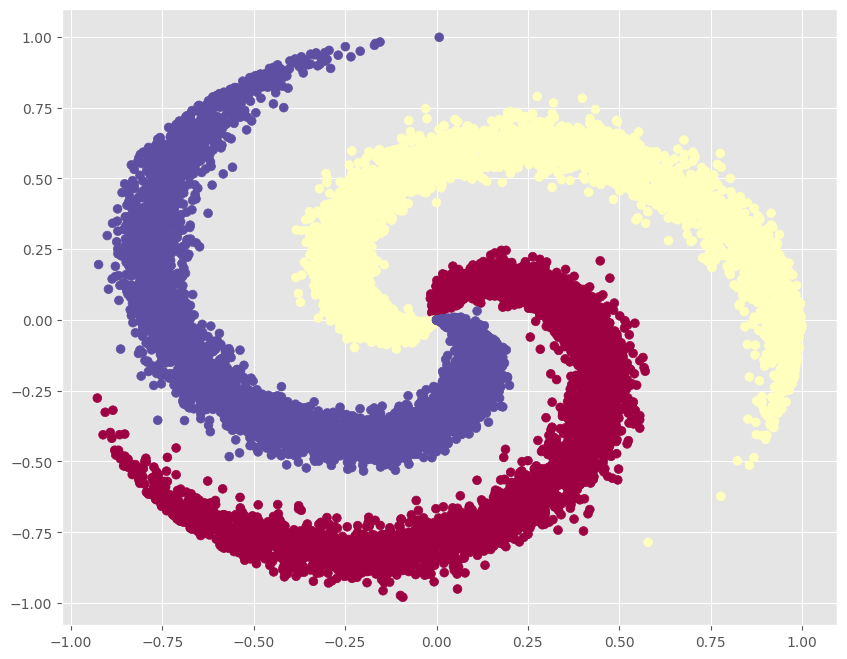

In [52]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [53]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

Building tree at depth 0 with purity 0.3413888888888889 and 18000 examples
Building tree at depth 1 with purity 0.4563031709203403 and 12930 examples
Building tree at depth 2 with purity 0.8044471519951264 and 3283 examples
Building tree at depth 3 with purity 0.5027624309392266 and 1267 examples
Building tree at depth 4 with purity 0.9825396825396825 and 630 examples
Building tree at depth 5 with purity 0.9983633387888707 and 611 examples
Building tree at depth 5 with purity 0.5263157894736842 and 19 examples
Building tree at depth 4 with purity 0.9717425431711146 and 637 examples
Building tree at depth 5 with purity 0.8404255319148937 and 94 examples
Building tree at depth 5 with purity 0.994475138121547 and 543 examples
Building tree at depth 3 with purity 0.9975198412698413 and 2016 examples
Building tree at depth 4 with purity 1.0 and 598 examples
Building tree at depth 5 with purity 1.0 and 574 examples
Building tree at depth 5 with purity 1.0 and 24 examples
Building tree at dep

In [54]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9985,0,15,10000
1,697,9288,15,10000
2,969,53,8978,10000
All,11651,9341,9008,30000


In [55]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4994,0,6,5000
1,317,4676,7,5000
2,473,29,4498,5000
All,5784,4705,4511,15000


In [56]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 
print(acc)
assert_greater_equal(acc, 0.78)

0.9417


(10000, 2)
[np.int64(0), np.int64(1), np.int64(2)]


AttributeError: 'Axes' object has no attribute 'hold'

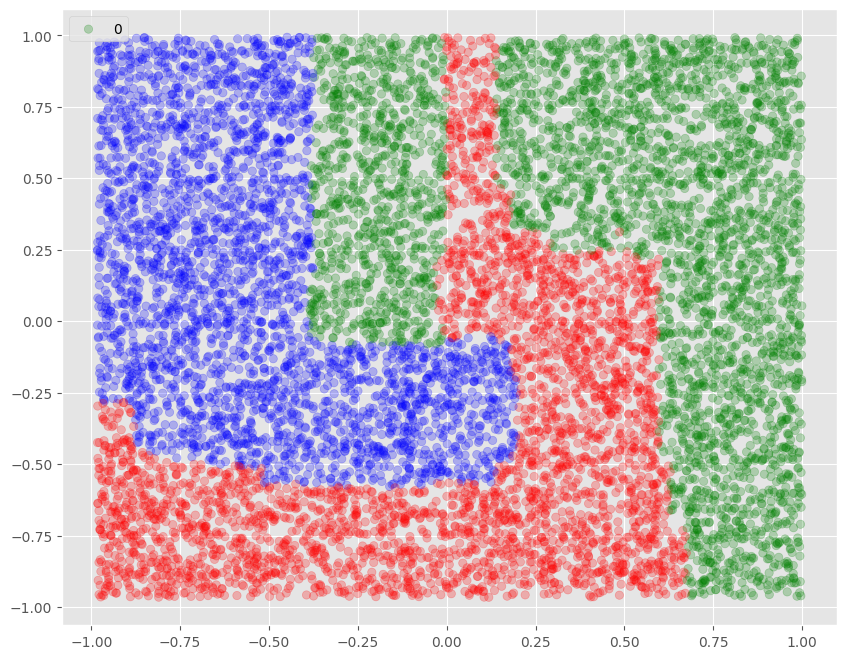

In [57]:
t.plot_points_range(rfc,X,Y)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


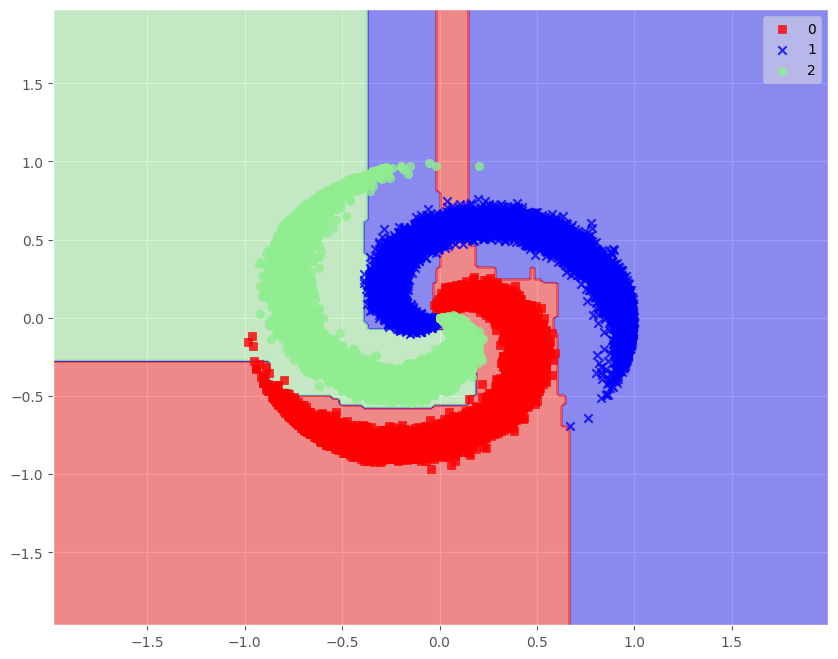

In [ ]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

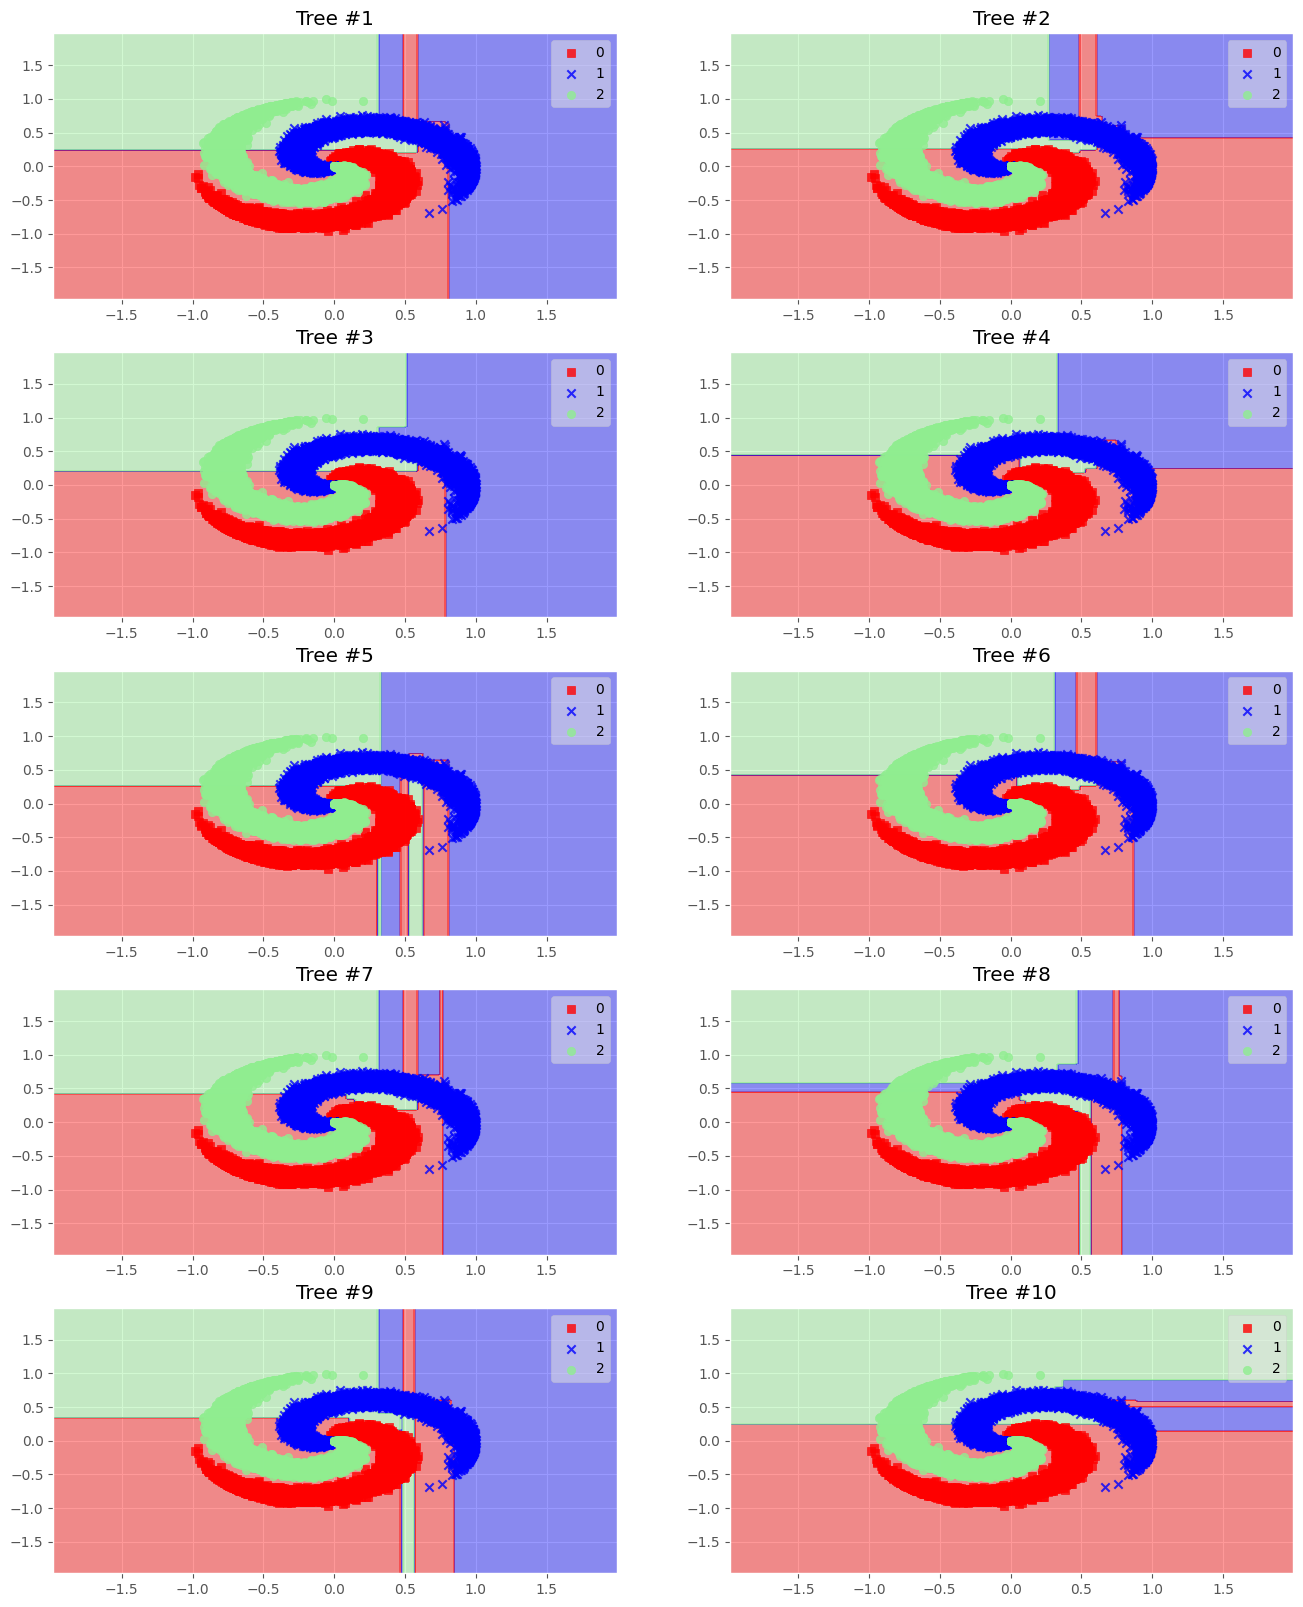

In [58]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(int(nrows),ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [65]:
nfolds = 4  
folds = t.generate_folds(X, Y, nfolds) 
ntrees = np.arange(2, 51) 
mean_acc = [] 
for p in range(len(ntrees)):
    totacc = []  
    for k in range(nfolds):
        rfc = rf.RandomForest(ntrees=p, weaklearner='Axis-Aligned-Random')
        rfc.train(folds[k][0], folds[k][1])
        Ypt = rfc.predict(folds[k][2])
        accuracy = np.sum(Ypt == folds[k][3]) / float(folds[k][3].shape[0])
        totacc.append(accuracy)  
    mean_accuracy = np.mean(totacc)
    mean_acc.append(mean_accuracy)
    print(f"Mean accuracy for {ntrees[p]} trees: {mean_accuracy:.4f}")

Generating CV data for 3 classes
Mean accuracy for 2 trees: 0.0000
Mean accuracy for 3 trees: 0.9023
Mean accuracy for 4 trees: 0.9124
Mean accuracy for 5 trees: 0.9501
Mean accuracy for 6 trees: 0.9258
Mean accuracy for 7 trees: 0.9612
Mean accuracy for 8 trees: 0.9416
Mean accuracy for 9 trees: 0.9699
Mean accuracy for 10 trees: 0.9660
Mean accuracy for 11 trees: 0.9551
Mean accuracy for 12 trees: 0.9778
Mean accuracy for 13 trees: 0.9769
Mean accuracy for 14 trees: 0.9828
Mean accuracy for 15 trees: 0.9782
Mean accuracy for 16 trees: 0.9831
Mean accuracy for 17 trees: 0.9787
Mean accuracy for 18 trees: 0.9784
Mean accuracy for 19 trees: 0.9706
Mean accuracy for 20 trees: 0.9734
Mean accuracy for 21 trees: 0.9824
Mean accuracy for 22 trees: 0.9833
Mean accuracy for 23 trees: 0.9788
Mean accuracy for 24 trees: 0.9784
Mean accuracy for 25 trees: 0.9865
Mean accuracy for 26 trees: 0.9805
Mean accuracy for 27 trees: 0.9845
Mean accuracy for 28 trees: 0.9892
Mean accuracy for 29 trees: 0.